## Imports and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import iqr
from sklearn.neighbors import LocalOutlierFactor

%matplotlib inline

In [2]:
iris = datasets.load_iris()
# iris

In [3]:
# iris.keys()

In [4]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# np.shape(data1)
data1.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
data1 = data1.drop(columns='target') 
# execute only once if more than once gonna be error

In [6]:
data1.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
np.shape(data1)

(150, 4)

## Data Preparation

In [8]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# inter quartile range each column
spl_iqr = iqr(data1['sepal length (cm)'])
spw_iqr = iqr(data1['sepal width (cm)'])
ptl_iqr = iqr(data1['petal length (cm)'])
ptw_iqr = iqr(data1['petal width (cm)'])

In [10]:
min_o_spl = 5.1 - 1.5*spl_iqr
max_o_spl = 6.4 + 1.5*spl_iqr

min_o_spw = 2.8 - 1.5*spw_iqr
max_o_spw = 3.3 + 1.5*spw_iqr

min_o_ptl = 1.6 - 1.5*ptl_iqr
max_o_ptl = 5.1 + 1.5*ptl_iqr

min_o_ptw = 0.3 - 1.5*ptw_iqr
max_o_ptw = 1.8 + 1.5*ptw_iqr

In [11]:
max_o_spw

4.05

In [12]:
max_o_spl

8.350000000000001

In [13]:
def outlier(data, min_trshld, max_trshld):
    list = []
    for dt in data:
        if dt > max_trshld:
            list.append(dt)
        elif dt < min_trshld:
            list.append(dt)
        else:
            list.append(0)
    return list

In [14]:
spl_out = outlier(data1['sepal length (cm)'], min_o_spl, max_o_spl)
spw_out = outlier(data1['sepal width (cm)'], min_o_spl, max_o_spl)
ptl_out = outlier(data1['petal length (cm)'], min_o_spl, max_o_spl)
ptw_out = outlier(data1['petal width (cm)'], min_o_spl, max_o_spl)

### Sepal length

In [15]:
# spl_out

In [16]:
spl_X = [[data1['sepal length (cm)']], [spl_out]]

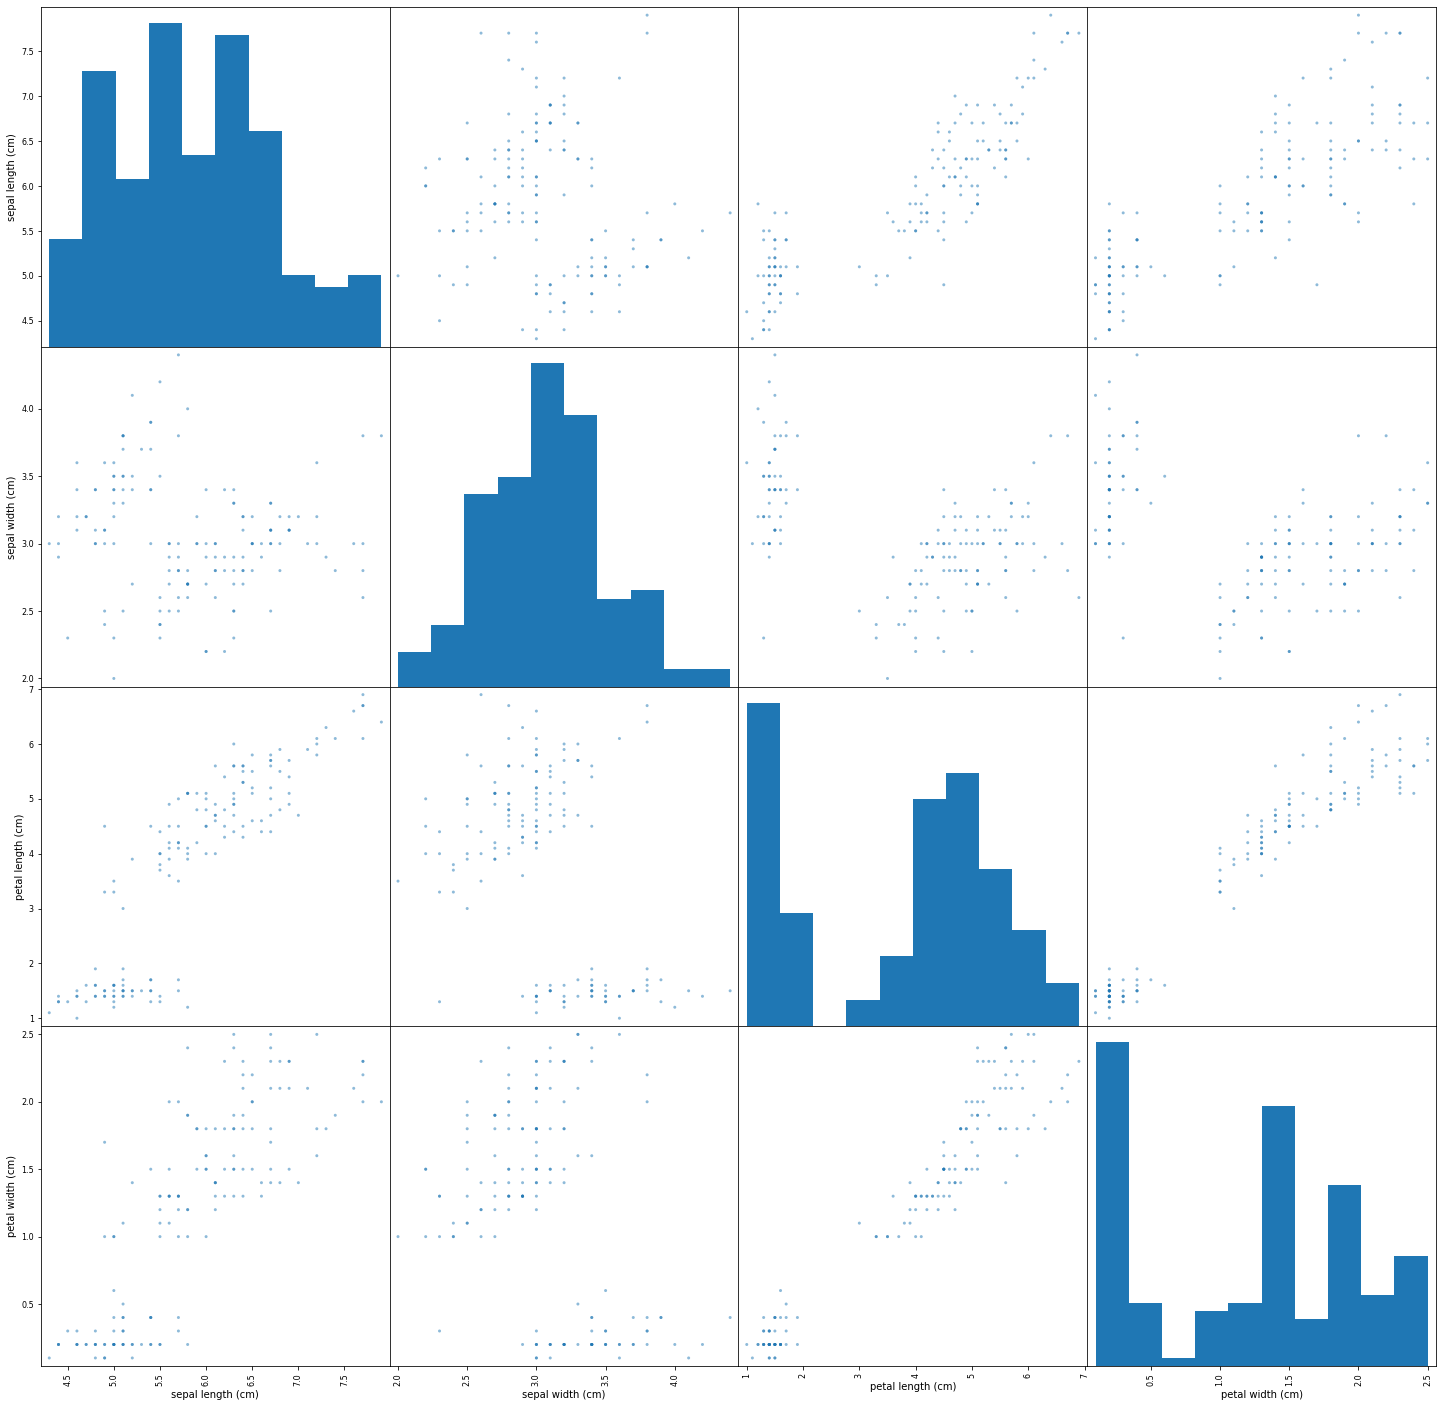

In [17]:
from pandas.plotting import scatter_matrix

p=scatter_matrix(data1,figsize=(25, 25))

In [18]:
# n_out_spl = len(spl_X)
# ground_truth_spl = np.ones(len(spl_X), dtype=int)
# ground_truth_spl[-n_out_spl:] = -1

# # fit the model for outlier detection (default)
# clf = LocalOutlierFactor(n_neighbors=5)
# # use fit_predict to compute the predicted labels of the training samples
# # (when LOF is used for outlier detection, the estimator has no predict,
# # decision_function and score_samples methods).
# y_pred = clf.fit_predict(spl_X)
# n_errors = (y_pred != ground_truth).sum()
# X_scores = clf.negative_outlier_factor_

# plt.title("Local Outlier Factor (LOF)")
# plt.scatter(spl_X[:, 0], spl_X[:, 1], color="k", s=3.0, label="Data points")
# # plot circles with radius proportional to the outlier scores
# radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# plt.scatter(
#     spl_X[:, 0],
#     spl_X[:, 1],
#     s=1000 * radius,
#     edgecolors="r",
#     facecolors="none",
#     label="Outlier scores",
# )
# plt.axis("tight")
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.xlabel("prediction errors: %d" % (n_errors))
# legend = plt.legend(loc="upper left")
# legend.legendHandles[0]._sizes = [10]
# legend.legendHandles[1]._sizes = [20]
# plt.show()